# Zillow Research Analysis

by: Armun Shakeri

In [1]:
# Ideas for analysis

# 3 year, 5 year, and 10 year
# forecast housing prices 
# ROI, highest and lowest
# Median Sale Price


## Overview and Business Problem

This project analyzes 3 bedroom homes in Texas to determine which 10 zipcodes had the highest ROI for 3, 5 and 10 year span. 

## Data Understanding

This data represents median monthly housing sales for 3 bedroom homes across the United States. 

Each row represents a unique ZipCode. Each record contains loccation info and median housing sales prices for each month.

There are 23404 rows and 281 variables:

RegionID: Unique index, 
<br />RegionName: Unique Zip Code,
<br />City: City in which the zip code is located,
<br />State: State in which the zip code is located,
<br />Metro: Metropolitan Area in which the zip code is located,
<br />CountyName: County in which the zip code is located,
<br />SizeRank: Numerical rank of size of zip code, ranked 1 through 23404
01-00 through 08-22: refers to the median housing sales values for January 2000 through August 2022, that is 274 data points of monthly data for each zip code

## Import standard packages and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv("Data/Zip_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,96603.0,...,232376.0,236021.0,239693.0,244103.0,249528.0,255561.0,261406.0,266140.0,269363.0,271087.0
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,163540.0,...,330128.0,334969.0,339733.0,346806.0,355476.0,365971.0,374539.0,379908.0,381471.0,380327.0
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,87170.0,...,167760.0,169442.0,171444.0,173448.0,175569.0,178832.0,182377.0,185780.0,188090.0,189856.0
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,324450.0,...,814606.0,815163.0,817786.0,818496.0,823195.0,827059.0,836542.0,842837.0,849412.0,852484.0
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,279395.0,...,749033.0,750202.0,754601.0,758353.0,764191.0,766694.0,772804.0,778368.0,783167.0,785138.0


Drop all states outside of Texas, and display information regarding columns. 

In [4]:
data = data[data['State'] == 'TX']
data.head()
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 0 to 23400
Data columns (total 281 columns):
 #   Column      Dtype  
---  ------      -----  
 0   RegionID    int64  
 1   SizeRank    int64  
 2   RegionName  int64  
 3   RegionType  object 
 4   StateName   object 
 5   State       object 
 6   City        object 
 7   Metro       object 
 8   CountyName  object 
 9   2000-01-31  float64
 10  2000-02-29  float64
 11  2000-03-31  float64
 12  2000-04-30  float64
 13  2000-05-31  float64
 14  2000-06-30  float64
 15  2000-07-31  float64
 16  2000-08-31  float64
 17  2000-09-30  float64
 18  2000-10-31  float64
 19  2000-11-30  float64
 20  2000-12-31  float64
 21  2001-01-31  float64
 22  2001-02-28  float64
 23  2001-03-31  float64
 24  2001-04-30  float64
 25  2001-05-31  float64
 26  2001-06-30  float64
 27  2001-07-31  float64
 28  2001-08-31  float64
 29  2001-09-30  float64
 30  2001-10-31  float64
 31  2001-11-30  float64
 32  2001-12-31  float64
 33  2002-01-31 

We will drop 'StateName' and 'RegionType' due to redundancy, and 'SizeRank' due to it being irrelevant for analysis. 

In [5]:
# Drop unnecessary columns 
data = data.drop(['RegionID', 'StateName', 'RegionType', 'SizeRank'], axis=1)

# Change name of 'RegionName' to 'ZipCode'
data = data.rename(columns={'RegionName': 'ZipCode'})

We can see that there are 101,792 missing values within the dataset. 

In [6]:
data.isna().sum().sum()

101792

The data has 1,293 rows and 279 columns.

In [7]:
data.shape

(1293, 277)

## Analyze 'ZipCode'

Next we will look at RegionName, this is the zip code. We can see that there are 419 unique values. 

In [8]:
data.ZipCode.value_counts() 

77880    1
76437    1
76476    1
78526    1
76085    1
        ..
78933    1
79226    1
77657    1
75134    1
77563    1
Name: ZipCode, Length: 1293, dtype: int64

All zipcodes are unique. I will change the astype to string.

In [9]:
data.ZipCode = data.ZipCode.astype('string')

In [10]:
data[['ZipCode', 'State']].sort_values(by=['ZipCode'])

,ZipCode,State
7529,75001,TX
142,75002,TX
768,75006,TX
571,75007,TX
6689,75009,TX
...,...,...
3745,79932,TX
4607,79934,TX
7240,79935,TX
2,79936,TX


## Analyze 'City'

In [11]:
data.City.nunique()

701

In [12]:
data.City.isna().sum()

102

In [13]:
data.City.fillna('None', inplace=True)

## Analyze 'Metro'

Fillna with None

In [14]:
print(data.Metro.value_counts())
print(data.Metro.nunique())

Dallas-Fort Worth-Arlington, TX         249
Houston-The Woodlands-Sugar Land, TX    213
San Antonio-New Braunfels, TX            94
Austin-Round Rock-Georgetown, TX         83
El Paso, TX                              26
                                       ... 
Hereford, TX                              1
Eagle Pass, TX                            1
Zapata, TX                                1
Rio Grande City-Roma, TX                  1
Pearsall, TX                              1
Name: Metro, Length: 71, dtype: int64
71


In [15]:
data.Metro.fillna('None', inplace=True)

In [16]:
data.Metro.value_counts()

Dallas-Fort Worth-Arlington, TX         249
Houston-The Woodlands-Sugar Land, TX    213
None                                    189
San Antonio-New Braunfels, TX            94
Austin-Round Rock-Georgetown, TX         83
                                       ... 
Hereford, TX                              1
Eagle Pass, TX                            1
Zapata, TX                                1
Rio Grande City-Roma, TX                  1
Pearsall, TX                              1
Name: Metro, Length: 72, dtype: int64

## Analyze 'CountyName'

In [17]:
data.CountyName.value_counts()

Harris County       129
Dallas County        77
Bexar County         65
Tarrant County       63
Travis County        45
                   ... 
Coleman County        1
Ward County           1
Armstrong County      1
Donley County         1
Uvalde County         1
Name: CountyName, Length: 206, dtype: int64

In [18]:
data.isna().sum()

ZipCode        0
State          0
City           0
Metro          0
CountyName     0
              ..
2022-04-30    16
2022-05-31    13
2022-06-30     6
2022-07-31     4
2022-08-31     0
Length: 277, dtype: int64

In [19]:
data.CountyName.fillna('None', inplace=True)

## Drop sales data that have missing values

We will need to drop all sales data that are missing sales values since we will not be able to use them for analysis. 

In [20]:
# 760 zip codes don't have full data
data[data['2000-01-31'].isna()]

,ZipCode,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
32,78521,TX,Brownsville,"Brownsville-Harlingen, TX",Cameron County,NaN,NaN,NaN,NaN,NaN,...,141332.0,143702.0,145785.0,148925.0,151875.0,155071.0,157557.0,160752.0,163829.0,167074.0
50,77573,TX,League City,"Houston-The Woodlands-Sugar Land, TX",Galveston County,NaN,NaN,NaN,NaN,NaN,...,290825.0,294876.0,297864.0,301136.0,305735.0,312295.0,317528.0,320674.0,321755.0,323265.0
86,78666,TX,San Marcos,"Austin-Round Rock-Georgetown, TX",Hays County,NaN,NaN,NaN,NaN,NaN,...,347549.0,354405.0,362174.0,372118.0,378769.0,385599.0,387554.0,389007.0,386720.0,383152.0
87,78572,TX,Mission,"McAllen-Edinburg-Mission, TX",Hidalgo County,NaN,NaN,NaN,NaN,NaN,...,155467.0,157316.0,159385.0,161236.0,163578.0,165853.0,168492.0,171377.0,174236.0,177440.0
93,78130,TX,New Braunfels,"San Antonio-New Braunfels, TX",Comal County,NaN,NaN,NaN,NaN,NaN,...,306869.0,313174.0,320356.0,326121.0,333881.0,342038.0,349460.0,354485.0,356144.0,357161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23278,77476,TX,Simonton,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,385388.0,389306.0,390118.0,389159.0
23325,79350,TX,New Deal,"Lubbock, TX",Lubbock County,NaN,NaN,NaN,NaN,NaN,...,107664.0,108907.0,110654.0,113874.0,114829.0,117038.0,117008.0,118964.0,120559.0,121161.0
23371,77978,TX,Point Comfort,"Port Lavaca, TX",Calhoun County,NaN,NaN,NaN,NaN,NaN,...,115988.0,118425.0,120843.0,123808.0,124556.0,125456.0,125696.0,127545.0,129641.0,132003.0
23372,77663,TX,Village Mills,"Beaumont-Port Arthur, TX",Hardin County,NaN,NaN,NaN,NaN,NaN,...,195445.0,197359.0,200307.0,202782.0,204581.0,206977.0,209768.0,213646.0,216736.0,219361.0


In [21]:
# All zipcodes have some data
data[data['2022-08-31'].isna()]

,ZipCode,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31


We will need to find an ROI that we can compare all of them on, nex

In [22]:
# I need to find an ROI that I can compare them all on
# Find the zips with the least data
# for col in reversed(data.columns):
#     if data[col].isna().sum() > 0:
#         print(col)
#         break

In [23]:
# 4 zip codes only go back to 07-22
# data[data['07-22'].isna()]

In [24]:
def melt_data(data):
    melted = pd.melt(data,
                     id_vars=['ZipCode', 'State', 'City', 'Metro', 'CountyName'],
                     var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [25]:
melted_data = melt_data(data)
melted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250195 entries, 0 to 351695
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ZipCode     250195 non-null  string        
 1   State       250195 non-null  object        
 2   City        250195 non-null  object        
 3   Metro       250195 non-null  object        
 4   CountyName  250195 non-null  object        
 5   Date        250195 non-null  datetime64[ns]
 6   value       250195 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4), string(1)
memory usage: 15.3+ MB


In [26]:
# Make sure the data type of the 'Date' column is datetime
melted_data['Date'] = pd.to_datetime(melted_data['Date'], format='%Y/%m')

# Set the 'Date' columns as index
melted_data.set_index('Date', inplace=True)

melted_data.info

<bound method DataFrame.info of            ZipCode State           City                                 Metro  \
Date                                                                            
2000-01-31   77449    TX           None  Houston-The Woodlands-Sugar Land, TX   
2000-01-31   77494    TX           None  Houston-The Woodlands-Sugar Land, TX   
2000-01-31   79936    TX        El Paso                           El Paso, TX   
2000-01-31   77084    TX        Houston  Houston-The Woodlands-Sugar Land, TX   
2000-01-31   78660    TX   Pflugerville      Austin-Round Rock-Georgetown, TX   
...            ...   ...            ...                                   ...   
2022-08-31   79350    TX       New Deal                           Lubbock, TX   
2022-08-31   79366    TX  Ransom Canyon                           Lubbock, TX   
2022-08-31   77978    TX  Point Comfort                       Port Lavaca, TX   
2022-08-31   77663    TX  Village Mills              Beaumont-Port Arthur, TX

In [27]:
melted_data.head()

,ZipCode,State,City,Metro,CountyName,value
Date,,,,,,
2000-01-31,77449,TX,None,"Houston-The Woodlands-Sugar Land, TX",Harris County,96603.0
2000-01-31,77494,TX,None,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,163540.0
2000-01-31,79936,TX,El Paso,"El Paso, TX",El Paso County,87170.0
2000-01-31,77084,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,96608.0
2000-01-31,78660,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,142867.0


## EDA on ZipCodes

In [28]:
print('Average TX home value' ,round(data['2022-08-31'].mean()))

Average TX home value 303454


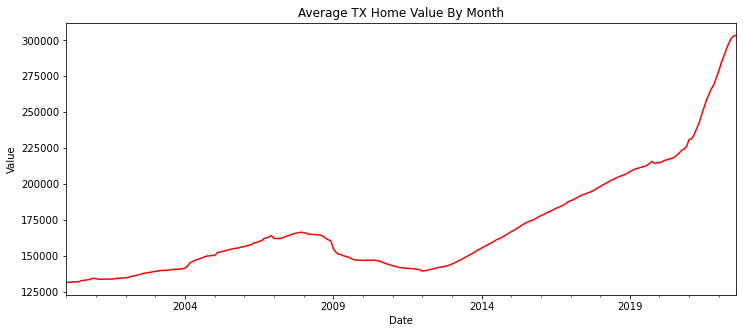

In [29]:
#Average Home Value by Month and Year
month_data = melted_data['value'].resample('MS').mean()
month_data = month_data.fillna(month_data.bfill())
month_data.plot(figsize=(12,5), color='red')
plt.title('Average TX Home Value By Month')
plt.ylabel('Value')
plt.show()

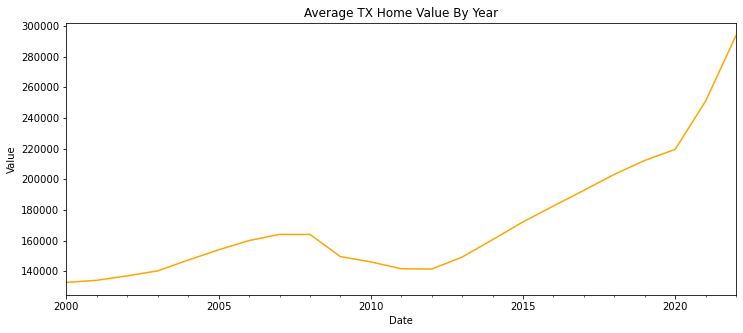

In [30]:
yr_data = melted_data['value'].resample('A').mean()
yr_data.plot.line(figsize=(12,5), color='orange')
plt.title('Average TX Home Value By Year')
plt.ylabel('Value')
plt.show()

## Top 10 Metro and County (mean)

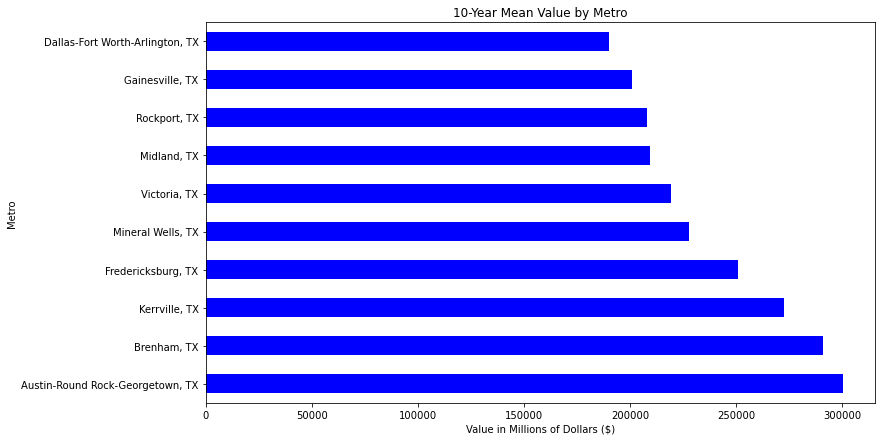

In [31]:
# Get Mean Home Value by metro
metro = melted_data.groupby('Metro')
metro = metro.value.mean()
metro = metro.sort_values(ascending=False).head(10)

# Plot Mean Home Value by Metro
metro.plot.barh(figsize=(12,7), color='blue')
plt.title('10-Year Mean Value by Metro')
plt.xlabel('Value in Millions of Dollars ($)')
plt.show()

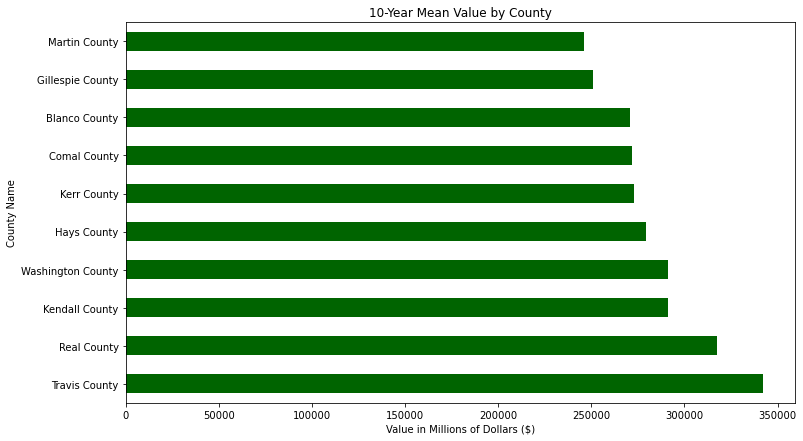

In [32]:
# Get Mean Home Value by County
county = melted_data.groupby('CountyName')
county = county.value.mean()
county = county.sort_values(ascending=False).head(10)

# Plot Mean Home Value by County
county.plot.barh(figsize = (12,7), color='darkgreen')
plt.title('10-Year Mean Value by County')
plt.xlabel('Value in Millions of Dollars ($)')
plt.ylabel('County Name')
plt.show()

## Most recent one year ROI

In [33]:
# Check out most recent 1 year ROI
data['recent_1_yr_ROI'] = (data['2022-08-31'] - data['2021-08-31'])/(data['2021-08-31'])
data['recent_1_yr_ROI']

0        0.232488
1        0.219513
2        0.182189
7        0.207553
17       0.123829
           ...   
23325    0.175567
23352    0.179743
23371    0.169669
23372    0.145991
23400         NaN
Name: recent_1_yr_ROI, Length: 1293, dtype: float64

In [34]:
# Lowest Values
data.sort_values('recent_1_yr_ROI').head()[['ZipCode', 'City', 'recent_1_yr_ROI']]

,ZipCode,City,recent_1_yr_ROI
15843,78650,McDade,-0.038050
5133,79764,Odessa,-0.001729
10220,75758,Chandler,0.001106
7696,77701,Beaumont,0.001393
16286,77335,None,0.004570


In [35]:
# Highest Values 
data.sort_values('recent_1_yr_ROI', ascending=False).head()[['ZipCode', 'City', 'recent_1_yr_ROI']]

,ZipCode,City,recent_1_yr_ROI
6514,76541,Killeen,0.405265
18276,78615,Coupland,0.382277
17560,75058,Gunter,0.362419
11436,78583,Rio Hondo,0.360510
15845,76569,Rogers,0.356386


## Top 10 ZipCode mean ROI

In [36]:
# Calculate average home value in the DataFrame
data['yr_avg']=data.iloc[:,-60:].mean(skipna=True, axis=1)

# Get zipcodes with an average value 2 decile above the median and 2 deciles below.
print(data['yr_avg'].describe(),'\n')

# Calculate the 70% cutoff value (2 decile above).
q_70 = data['yr_avg'].quantile(q=0.70)
print(f'Average Value 70% cutoff value: {round(q_70,2)}')

# Calculate the 30% cutoff value (2 deciles below).
q_30 = data['yr_avg'].quantile(q=0.30)
print(f'Average Value 30% cutoff value: {round(q_30,2)}')

# Get data frame with selected zipcodes.
data_avg = data[(data['yr_avg']<q_70) & (data['yr_avg']>q_30)]
print(f'Amount of zipcodes: {len(data_avg)}')

count    1.293000e+03
mean     2.252465e+05
std      1.291236e+05
min      5.522542e+04
25%      1.509374e+05
50%      1.945346e+05
75%      2.580096e+05
max      1.924567e+06
Name: yr_avg, dtype: float64 

Average Value 70% cutoff value: 240801.07
Average Value 30% cutoff value: 162913.46
Amount of zipcodes: 517


We will build risk profile using coefficient of variation and assume that above 60 percentile is risky. This is a very common method used by many investors and analysts to determine the volatility and risk when making investments. The lower the ratio of the standard deviation to mean return, the better risk-return trade-off.

In [37]:
# Calculate historical return on investment
data_avg['ROI'] = (data_avg['yr_avg']/data_avg['2000-08-31'])-1

# Calculate standard deviation of monthly values
data_avg['std'] = data_avg.loc[:,'2000-08-31':'2022-08-31'].std(skipna=True, axis=1)

# Calculate historical mean value
data_avg['mean'] = data_avg.loc[:, '2000-08-31':'2022-08-31'].mean(skipna=True, axis=1)

# Calculate coefficient of variation
data_avg['CV'] = data_avg['std']/data_avg['mean']

# Show calculated values
data_avg[['ZipCode','std','mean','ROI','CV','CountyName']].head()

,ZipCode,std,mean,ROI,CV,CountyName
0,77449,38255.348186,134568.811321,0.965331,0.284281,Harris County
7,77084,35940.504716,133920.822642,0.935217,0.268371,Harris County
34,75052,50213.676283,147757.241509,1.152440,0.339839,Dallas County
36,77433,41345.208111,170054.267925,0.803552,0.243129,Harris County
52,77429,41718.370106,169614.011321,0.838165,0.245961,Harris County


In [38]:
# Find out the top 10 counties with highest ROI
grp_county = data_avg.groupby('CountyName', group_keys=False).sum()['ROI']
grp_county.sort_values(ascending=False)[:10]

CountyName
Harris County        54.517058
Dallas County        40.584509
Tarrant County       40.401031
Bexar County         35.143200
Montgomery County    12.017695
Brazoria County      10.464508
Fort Bend County      8.534071
Gregg County          8.005692
Lubbock County        4.701615
Denton County         3.420254
Name: ROI, dtype: float64

In [39]:
# Top 10 counties with highest ROI before considering risk factor CV
grp_county.sort_values(ascending=False)[:10].keys()

Index(['Harris County', 'Dallas County', 'Tarrant County', 'Bexar County',
       'Montgomery County', 'Brazoria County', 'Fort Bend County',
       'Gregg County', 'Lubbock County', 'Denton County'],
      dtype='object', name='CountyName')

In [40]:
# Descriptive statistics of coeficients of variance
print(data_avg.CV.describe())

# Define upper limit of CV according to risk profile
thresh_cv = data_avg.CV.quantile(.6)
print(f'\nCV upper limit: {thresh_cv}')

# Get the 10 counties with highest ROIs within the firms risk profile
data_top10 = data_avg[data_avg['CV']<thresh_cv].sort_values('ROI', axis=0, ascending=False)

# Find out the top 10 counties with highest ROI
grp_county = data_top10.groupby('CountyName').sum()['ROI']
grp_county.sort_values(ascending=False)[:10]

count    516.000000
mean       0.235770
std        0.081496
min        0.013246
25%        0.191332
50%        0.243798
75%        0.284897
max        0.463360
Name: CV, dtype: float64

CV upper limit: 0.25736849345388185


CountyName
Harris County        29.353340
Bexar County          7.554121
Fort Bend County      6.311819
Brazoria County       4.811210
Montgomery County     4.472374
Gregg County          4.069725
Lubbock County        3.399041
El Paso County        2.622002
Galveston County      0.891431
Guadalupe County      0.843617
Name: ROI, dtype: float64

In [41]:
top10_county = list(grp_county.sort_values(ascending=False)[:10].index)
top10_county

['Harris County',
 'Bexar County',
 'Fort Bend County',
 'Brazoria County',
 'Montgomery County',
 'Gregg County',
 'Lubbock County',
 'El Paso County',
 'Galveston County',
 'Guadalupe County']

In [42]:
data_top10 = data_top10.loc[data_top10['CountyName'].isin(top10_county)]

In [43]:
# Check how many ZipCode are in each county
data_top10['CountyName'].value_counts()

Harris County        36
Fort Bend County     10
Bexar County          9
Brazoria County       7
Montgomery County     6
El Paso County        5
Galveston County      5
Lubbock County        4
Gregg County          4
Guadalupe County      3
Name: CountyName, dtype: int64

In [44]:
# Get city and state names for each ZipCode
ziplist = []
roi_top10 = {}

for i in top10_county:
    City = data_top10[data_top10['CountyName']==i].City.values[0]
    Metro = data_top10[data_top10['CountyName']==i].Metro.values[0]
    County = data_top10[data_top10['CountyName']==i].CountyName.values[0]
    ZipCode = data_top10[data_top10['CountyName']==i].ZipCode.values[0]
    ROI = (data_top10[data_top10['CountyName']==i].mean()['ROI'])*100
    
    ziplist.append(str(ZipCode))

    roi_top10[i] = ROI
    print(f'County: {i}, Average ROI: {ROI} \nCity: {City}, ZipCode: {ZipCode}, Metro: {Metro}\n')

County: Harris County, Average ROI: 81.53705671672635 
City: Crosby, ZipCode: 77532, Metro: Houston-The Woodlands-Sugar Land, TX

County: Bexar County, Average ROI: 83.93467554304374 
City: San Antonio, ZipCode: 78229, Metro: San Antonio-New Braunfels, TX

County: Fort Bend County, Average ROI: 78.8977328380016 
City: Rosenberg, ZipCode: 77471, Metro: Houston-The Woodlands-Sugar Land, TX

County: Brazoria County, Average ROI: 96.22419210416874 
City: West Columbia, ZipCode: 77486, Metro: Houston-The Woodlands-Sugar Land, TX

County: Montgomery County, Average ROI: 74.539561572528 
City: The Woodlands, ZipCode: 77380, Metro: Houston-The Woodlands-Sugar Land, TX

County: Gregg County, Average ROI: 101.74313673018614 
City: Longview, ZipCode: 75605, Metro: Longview, TX

County: Lubbock County, Average ROI: 84.97603401477758 
City: Wolfforth, ZipCode: 79382, Metro: Lubbock, TX

County: El Paso County, Average ROI: 65.55005487866306 
City: El Paso, ZipCode: 79902, Metro: El Paso, TX

County

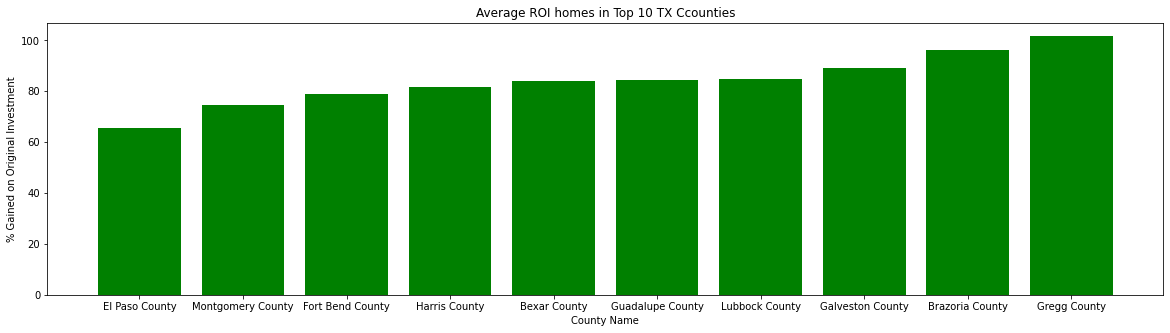

In [45]:
x = dict(sorted(roi_top10.items(), key=lambda item: item[1])).keys()
y = dict(sorted(roi_top10.items(), key=lambda item: item[1])).values()

plt.figure(figsize=(20,5))
plt.bar(x,y, color='green')
plt.title('Average ROI homes in Top 10 TX Ccounties')
plt.xlabel('County Name')
plt.ylabel('% Gained on Original Investment')
plt.show()

Our analysis shows that all top 10 counties saw ROI above 125% since April 1996. Out of those counties, San Luis Obispo, Alameda, and Ornage counties had the highest ROI around 200%.

In [46]:
zip_77532 = melted_data[melted_data.ZipCode == '77532']
zip_78229 = melted_data[melted_data.ZipCode == '78229']
zip_77471 = melted_data[melted_data.ZipCode == '77471']
zip_77486 = melted_data[melted_data.ZipCode == '77486']
zip_77380 = melted_data[melted_data.ZipCode == '77380']
zip_75605 = melted_data[melted_data.ZipCode == '75605']
zip_79382 = melted_data[melted_data.ZipCode == '79382']
zip_79902 = melted_data[melted_data.ZipCode == '79902']
zip_77546 = melted_data[melted_data.ZipCode == '77546']
zip_78154 = melted_data[melted_data.ZipCode == '78154']

In [47]:
zip_data = pd.DataFrame()
zip_data = zip_data.append(zip_77532)
zip_data = zip_data.append(zip_78229)
zip_data = zip_data.append(zip_77471)
zip_data = zip_data.append(zip_77486)
zip_data = zip_data.append(zip_77380)
zip_data = zip_data.append(zip_75605)
zip_data = zip_data.append(zip_79382)
zip_data = zip_data.append(zip_79902)
zip_data = zip_data.append(zip_77546)
zip_data = zip_data.append(zip_78154)
zip_data.head()

,ZipCode,State,City,Metro,CountyName,value
Date,,,,,,
2000-01-31,77532,TX,Crosby,"Houston-The Woodlands-Sugar Land, TX",Harris County,98841.0
2000-02-29,77532,TX,Crosby,"Houston-The Woodlands-Sugar Land, TX",Harris County,99293.0
2000-03-31,77532,TX,Crosby,"Houston-The Woodlands-Sugar Land, TX",Harris County,99466.0
2000-04-30,77532,TX,Crosby,"Houston-The Woodlands-Sugar Land, TX",Harris County,99917.0
2000-05-31,77532,TX,Crosby,"Houston-The Woodlands-Sugar Land, TX",Harris County,99827.0


In [48]:
zip_ts = []
for zc in zip_data.ZipCode.unique():
    #Create separate dataframes for each zipcode with a monthly frequency.
    top5_data = zip_data[zip_data['ZipCode']==zc].asfreq('MS')
    zip_ts.append(top5_data)

In [49]:
#Calculate monthly returns in new column 'ret' for each zipcode.
for zc in range(len(zip_ts)):
    zip_ts[zc]['ret']=np.nan*len(zip_ts[zc])
    for i in range(len(zip_ts[zc])-1):
        zip_ts[zc]['ret'][i+1]= ((zip_ts[zc].value.iloc[i+1] / zip_ts[zc].value.iloc[i]) - 1) * 100

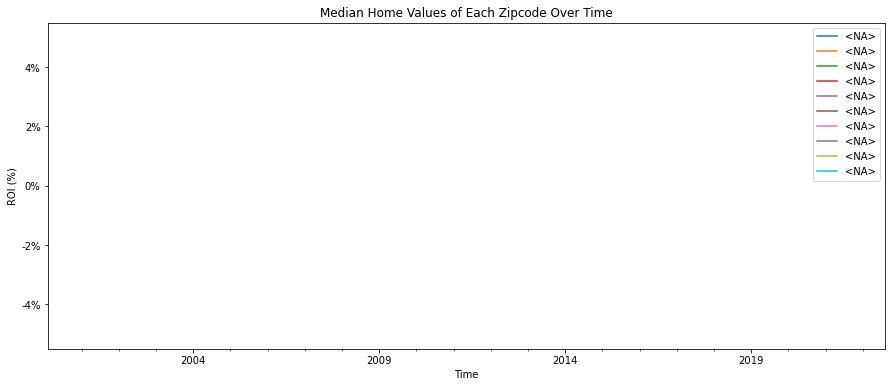

In [50]:
# Plot Median Home Values Over ime
for i in range(10):
    ax = zip_ts[i].ret.plot(label=zip_ts[i].ZipCode[0],figsize=(15,6))
    plt.title('Median Home Values of Each Zipcode Over Time')
    plt.xlabel('Time')
    plt.ylabel('ROI (%)')
    
    # manipulate
    vals = ax.get_yticks()
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    plt.legend();
    
######## Neeed help with this

## Preprocessing

In [51]:
# Create a dictionary for each ZipCode
ts = {}
for zc in ziplist:
    temp_data = melted_data.groupby('ZipCode').get_group(zc).sort_index()['value']
    ts[zc] = temp_data

In [52]:
ts

{'77532': Date
 2000-01-31     98841.0
 2000-02-29     99293.0
 2000-03-31     99466.0
 2000-04-30     99917.0
 2000-05-31     99827.0
                 ...   
 2022-04-30    253658.0
 2022-05-31    258242.0
 2022-06-30    261621.0
 2022-07-31    263594.0
 2022-08-31    264674.0
 Name: value, Length: 272, dtype: float64,
 '78229': Date
 2000-01-31    102278.0
 2000-02-29    102296.0
 2000-03-31    102398.0
 2000-04-30    102485.0
 2000-05-31    101790.0
                 ...   
 2022-04-30    252489.0
 2022-05-31    255353.0
 2022-06-30    257522.0
 2022-07-31    258343.0
 2022-08-31    258747.0
 Name: value, Length: 272, dtype: float64,
 '77471': Date
 2000-01-31     97120.0
 2000-02-29     97297.0
 2000-03-31     97659.0
 2000-04-30     98006.0
 2000-05-31     97790.0
                 ...   
 2022-04-30    255920.0
 2022-05-31    260765.0
 2022-06-30    264013.0
 2022-07-31    265312.0
 2022-08-31    264613.0
 Name: value, Length: 272, dtype: float64,
 '77486': Date
 2000-01-31     952

In [53]:
ts_data = pd.DataFrame(ts)
ts_data.head()

,77532,78229,77471,77486,77380,75605,79382,79902,77546,78154
Date,,,,,,,,,,
2000-01-31,98841.0,102278.0,97120.0,95295.0,124315.0,96438.0,90856.0,115157.0,116817.0,127199.0
2000-02-29,99293.0,102296.0,97297.0,94999.0,124386.0,96570.0,91586.0,115152.0,116746.0,127446.0
2000-03-31,99466.0,102398.0,97659.0,94827.0,124464.0,96675.0,92131.0,114934.0,116437.0,127348.0
2000-04-30,99917.0,102485.0,98006.0,94754.0,124675.0,97001.0,93192.0,114847.0,116371.0,127301.0
2000-05-31,99827.0,101790.0,97790.0,95101.0,124982.0,97368.0,93774.0,115012.0,116334.0,126271.0


In [54]:
ts_77532 = ts_data[ziplist[0]].copy()

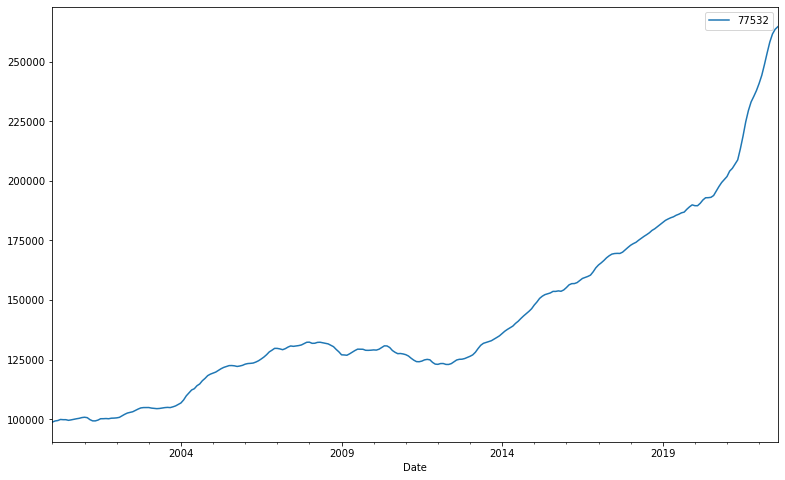

In [55]:
ax = ts_77532.plot(figsize=(13,8))
ax.legend()
plt.show()

### Train-Test Split

In [56]:
# Find the index to split 15% of the data
train_size = 0.85
split_idx = round(len(ts_77532)* train_size)
split_idx

# Split
train = ts_77532.iloc[:split_idx]
test = ts_77532.iloc[split_idx:]

## Model 1: Random Walk Model

For our first iteration we will use a simple prediction model, Random Walk Model. This model ccan be the baseline model to compare how our more sophisticated models, ARIMA and SARIMA, perform; by evaluating AIC and RMS. 

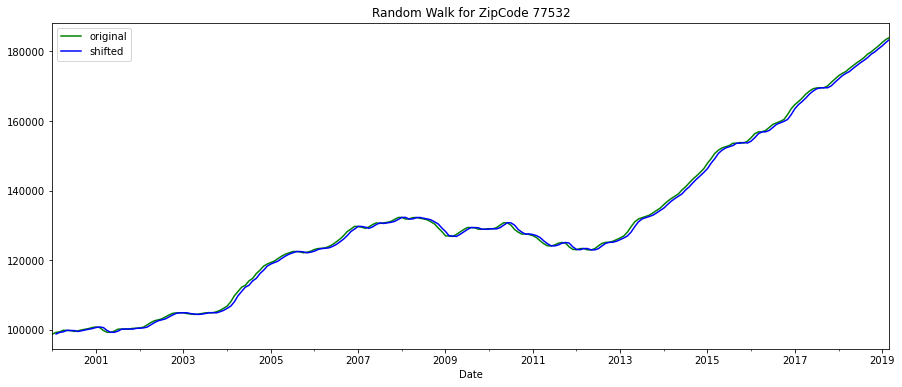

In [57]:
train = ts_77532.iloc[:split_idx]
random_walk = train.shift(1)

fig,ax = plt.subplots(figsize=(15,6))

train[0:270].plot(ax=ax, c='green', label='original')
random_walk[0:270].plot(ax=ax, c='blue', label='shifted')
ax.set_title('Random Walk for ZipCode 77532')
ax.legend();

In [58]:
# Calculate the Root Mean Squared Error for above data
residuals = random_walk - train
rmse = mean_squared_error(train[1:], random_walk.dropna())
rmse 
# this will be used as a benchmark for our modeling process

446577.9304347826